In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from textblob import TextBlob

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [8]:
sia = SentimentIntensityAnalyzer()    #sentiment analysis with the VADER (Valence Aware Dictionary and sEntiment Reasoner) model,
#which is available in the nltk (Natural Language Toolkit) library

In [9]:
df = pd.read_csv("C:\\Users\\Aparna Mondal\\Downloads\\archive (2)\\twitter_dataset.csv")

In [10]:
display(df.head())
display(df.info())

,Tweet_ID,Username,Text,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


None

In [11]:
df.rename(columns={'Text': 'tweet'}, inplace=True)  #text tweet to 

In [12]:
display(df.head())
display(df.info())

,Tweet_ID,Username,tweet,Retweets,Likes,Timestamp
0,1,julie81,Party least receive say or single. Prevent pre...,2,25,2023-01-30 11:00:51
1,2,richardhester,Hotel still Congress may member staff. Media d...,35,29,2023-01-02 22:45:58
2,3,williamsjoseph,Nice be her debate industry that year. Film wh...,51,25,2023-01-18 11:25:19
3,4,danielsmary,Laugh explain situation career occur serious. ...,37,18,2023-04-10 22:06:29
4,5,carlwarren,Involve sense former often approach government...,27,80,2023-01-24 07:12:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   tweet      10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB


None

In [13]:
print(df.columns)  

Index(['Tweet_ID', 'Username', 'tweet', 'Retweets', 'Likes', 'Timestamp'], dtype='object')


In [15]:
print(df.isnull().sum())

Tweet_ID     0
Username     0
tweet        0
Retweets     0
Likes        0
Timestamp    0
dtype: int64


In [16]:
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment analysis
df['sentiment'] = df['tweet'].apply(get_sentiment)

# Show results
print(df.head())

# Count sentiment distribution
print(df['sentiment'].value_counts())

   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                               tweet  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. ...        37     18   
4  Involve sense former often approach government...        27     80   

             Timestamp sentiment  
0  2023-01-30 11:00:51  Positive  
1  2023-01-02 22:45:58  Positive  
2  2023-01-18 11:25:19  Positive  
3  2023-04-10 22:06:29  Positive  
4  2023-01-24 07:12:21  Positive  
sentiment
Positive    7901
Negative    1711
Neutral      388
Name: count, dtype: int64


In [17]:
print(df.columns) 

Index(['Tweet_ID', 'Username', 'tweet', 'Retweets', 'Likes', 'Timestamp',
       'sentiment'],
      dtype='object')


this is performing sentiment analysis on a given text using VADER (Valence Aware Dictionary and sEntiment Reasoner) from nltk. It classifies the text as Positive, Negative, or Neutral based on sentiment scores.

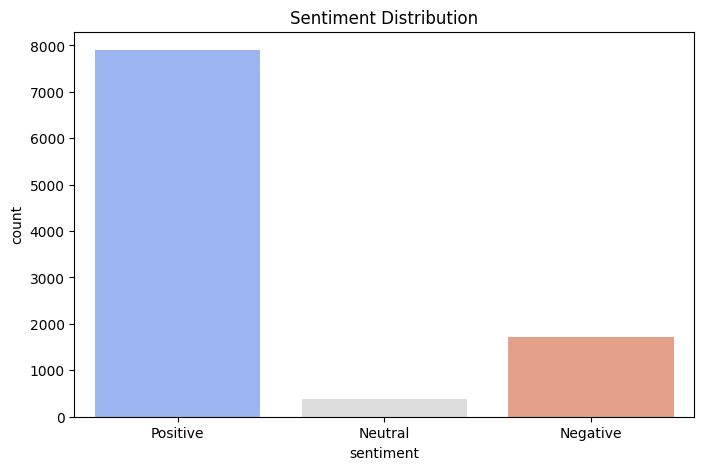

In [18]:
df['sentiment'] = df['tweet'].apply(get_sentiment)

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', legend=False)
plt.title("Sentiment Distribution")
plt.show()

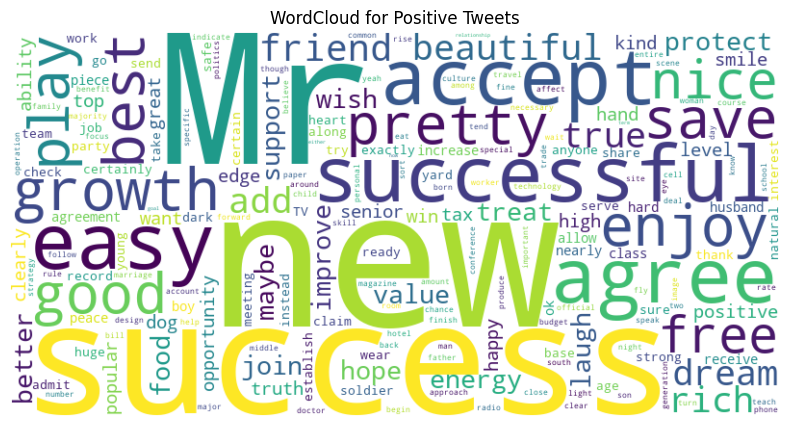

In [19]:
if 'tweet' in df.columns:
    positive_tweets = " ".join(df[df['sentiment'] == "Positive"]['tweet'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("WordCloud for Positive Tweets")
    plt.show()

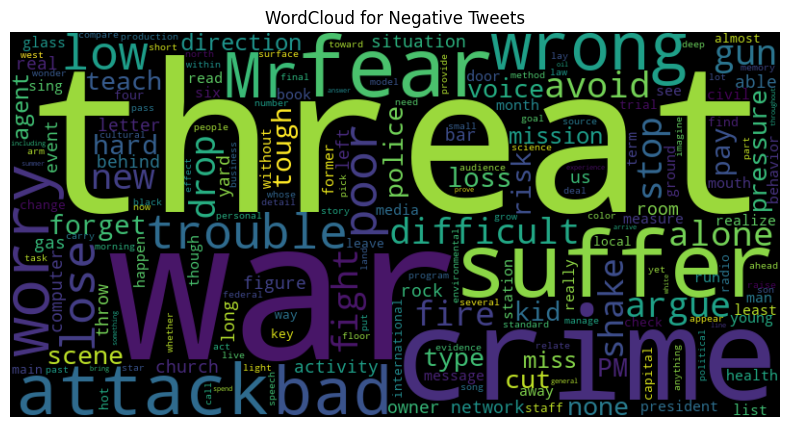

In [20]:
negative_tweets = " ".join(df[df['sentiment'] == "Negative"]['tweet'])

wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud for Negative Tweets")
plt.show()

In [21]:
print(df.columns)


Index(['Tweet_ID', 'Username', 'tweet', 'Retweets', 'Likes', 'Timestamp',
       'sentiment'],
      dtype='object')


In [22]:
df['Cleaned_Text'] = df['tweet'].str.lower().str.replace(r'[^\w\s#]', '', regex=True)


In [23]:
print(df.columns)

Index(['Tweet_ID', 'Username', 'tweet', 'Retweets', 'Likes', 'Timestamp',
       'sentiment', 'Cleaned_Text'],
      dtype='object')


In [24]:
print(df.isnull().sum())

Tweet_ID        0
Username        0
tweet           0
Retweets        0
Likes           0
Timestamp       0
sentiment       0
Cleaned_Text    0
dtype: int64


In [28]:
# Ensure 'hashtags' column exists and contains lists
if 'hashtags' in df.columns:
    all_hashtags = [tag for sublist in df['hashtags'] for tag in sublist]  # Flatten list
    hashtag_counts = Counter(all_hashtags)  # Count hashtags
    
    # Get top 10 most common hashtags
    common_hashtags = hashtag_counts.most_common(10)

    if common_hashtags:  # Ensure there are hashtags before plotting
        tags, counts = zip(*common_hashtags)
        plt.figure(figsize=(8, 5))
        sns.barplot(y=list(tags), x=list(counts), palette="coolwarm")
        plt.title("Top Hashtags Used")
        plt.xlabel("Count")
        plt.ylabel("Hashtags")
        plt.show()
    else:
        print("No hashtags found in the dataset.")
else:
    print("Column 'hashtags' not found in DataFrame.")


Column 'hashtags' not found in DataFrame.


In [29]:
df.rename(columns={'Text': 'tweet'}, inplace=True)


In [30]:
print(df['tweet'].head(10))  #  first 10 rows of tweets

0    Party least receive say or single. Prevent pre...
1    Hotel still Congress may member staff. Media d...
2    Nice be her debate industry that year. Film wh...
3    Laugh explain situation career occur serious. ...
4    Involve sense former often approach government...
5    Cell without report weight. Could father chang...
6    Receive difference their. Responsibility build...
7    Five sort guy why politics than. Somebody pret...
8    Reveal table state view manager she. Fly yeah ...
9    List allow family rather continue. Agency mess...
Name: tweet, dtype: object


In [32]:
import re
def extract_hashtags(text):
    return re.findall(r'#\w+', text)  # Find hashtags using regex

df['hashtags'] = df['tweet'].astype(str).apply(extract_hashtags)  # Apply function

# ✅ Flatten the list of hashtags
hashtags = [tag for sublist in df['hashtags'] for tag in sublist]

# ✅ Check if hashtags exist before visualizing
if hashtags:
    hashtag_counts = Counter(hashtags)
    common_hashtags = hashtag_counts.most_common(10)  # Get top 10 hashtags

    # ✅ Prepare for visualization
    tags, counts = zip(*common_hashtags)
    plt.figure(figsize=(8, 5))
    sns.barplot(y=list(tags), x=list(counts), palette="coolwarm")
    plt.title("Top Hashtags Used")
    plt.xlabel("Count")
    plt.ylabel("Hashtags")
    plt.show()
else:
    print("No hashtags found in the dataset.")


No hashtags found in the dataset.


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Define text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

# Apply text cleaning
df['Cleaned_Text'] = df['tweet'].astype(str).apply(clean_text)

# ✅ Define TF-IDF Vectorizer **before** using it
vectorizer = TfidfVectorizer(max_features=5000)

# ✅ Now use Cleaned_Text safely
X = vectorizer.fit_transform(df['Cleaned_Text'])


In [35]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    return text

df['Cleaned_Text'] = df['tweet'].astype(str).apply(clean_text)


X = vectorizer.fit_transform(df['Cleaned_Text'])  # Now use Cleaned_Text


In [36]:
df.explode('hashtags').groupby('hashtags')['sentiment'].value_counts()

Series([], Name: count, dtype: int64)

In [21]:
df.to_csv("processed_twitter_dataset.csv", index=False)
print("\nProcessed dataset saved as 'processed_twitter_dataset.csv'.")


Processed dataset saved as 'processed_twitter_dataset.csv'.


In [22]:
# Check missing values
print(df.isnull().sum())

Tweet_ID     0
Username     0
tweet        0
Retweets     0
Likes        0
Timestamp    0
sentiment    0
dtype: int64


In [81]:
df[df['hashtags'].astype(bool)].sort_values(by='Likes', ascending=False).head(10)

,Tweet_ID,Username,tweet,Retweets,Likes,Timestamp,sentiment,Cleaned_Text,hashtags


Train a Random Forest model to predict engagement (likes, shares) based on tweet features.
This model predicts which type of AI-generated content will perform best.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sentiment_Encoded'] = label_encoder.fit_transform(df['sentiment'])   # Example mapping: Negative -> 0, Neutral -> 1, Positive -> 2



df['Text_Length'] = df['tweet'].apply(len)  # Create a new feature (length of text)

# Selecting features
features = df[['Text_Length', 'Sentiment_Encoded']]  
target = df['Likes']                                             # Assuming 'Likes' is the engagement metric


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) #split

# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 906.2343512016106


This mimics your platform’s scheduling feature.

In [41]:
import datetime

def schedule_post(content, platform, days_later):
    post_time = datetime.datetime.now() + datetime.timedelta(days=days_later)
    return f"Scheduled post on {platform} at {post_time.strftime('%Y-%m-%d %H:%M:%S')}: {content}"

post_text = "Try our new rainy special coffee! ☕❄️ #kolkataCafes"
scheduled_message = schedule_post(post_text, "Twitter", 2)
print(scheduled_message)


Scheduled post on Twitter at 2025-02-13 23:57:47: Try our new rainy special coffee! ☕❄️ #kolkataCafes
